2021-10-26	<br/>
Ultra Trail Running<br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-10-26/readme.md

Map ISO 3 - Completed <br/>
Facet plot - Completed

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default='notebook'
import os




In [2]:
df=pd.read_csv('race.csv')

In [3]:
df.head()

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants
0,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
1,72496,UTMB®,UTMB®,Chamonix,France,2021-08-27,17:00:00,Solo,170.7,9930,-9930,11,2300
2,69855,Grand Raid des Pyrénées,Ultra Tour 160,vielle-Aure,France,2021-08-20,05:00:00,solo,167.0,9980,-9980,13,600
3,67856,Persenk Ultra,PERSENK ULTRA,Asenovgrad,Bulgaria,2021-08-20,18:00:00,solo,164.0,7490,-7500,13,150
4,70469,Runfire Salt Lake Ultra,100 Mile,ulukisla,Turkey,2021-08-20,18:00:00,solo,159.9,100,-100,12,0


In [4]:
df1=pd.read_csv('ultra_rankings.csv')

In [5]:
df1.head()

,race_year_id,rank,runner,time,age,gender,nationality,time_in_seconds
0,68140,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0
1,68140,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0
2,68140,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0
3,68140,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0
4,68140,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0


In [6]:
race=pd.merge(df,df1,on='race_year_id',how='inner')

In [7]:
race.head()

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,rank,runner,time,age,gender,nationality,time_in_seconds
0,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0
1,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0
2,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0
3,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0
4,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0


In [8]:
df.shape

(1207, 13)

In [9]:
df1.shape

(137803, 8)

In [10]:
race.shape

(137803, 20)

In [11]:
# Checking if all the country codes are the same length
race.loc[race.nationality.str.len()!=3]

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,rank,runner,time,age,gender,nationality,time_in_seconds


In [12]:
import pycountry

In [13]:
# Mapping country and abbrevation

def findCountryAlpha3 (country_name):
    try:
        return pycountry.countries.get(alpha_3=country_name).name
    except:
        return ("not founded!")

In [14]:
race['country_alpha_3'] = race.apply(lambda row: findCountryAlpha3(row.nationality) , axis = 1)

In [15]:
race['country_alpha_3']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
137798     United States
137799            Canada
137800            Canada
137801     United States
137802     United States
Name: country_alpha_3, Length: 137803, dtype: object

In [16]:
race.head()

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,...,aid_stations,participants,rank,runner,time,age,gender,nationality,time_in_seconds,country_alpha_3
0,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,10,150,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0,United Kingdom
1,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,10,150,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0,United Kingdom
2,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,10,150,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0,United Kingdom
3,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,10,150,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0,United Kingdom
4,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,10,150,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0,United Kingdom


In [17]:
# Check if Home/Away
def isHome(c1,c2):
    if c1==c2:
        return 'Home'
    else: 
        return 'Away'

In [18]:

race['is_home'] = race.apply(lambda row: isHome(row.country, row.country_alpha_3) , axis = 1)

In [19]:
race.head()

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,...,participants,rank,runner,time,age,gender,nationality,time_in_seconds,country_alpha_3,is_home
0,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,150,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0,United Kingdom,Home
1,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,150,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0,United Kingdom,Home
2,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,150,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0,United Kingdom,Home
3,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,150,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0,United Kingdom,Home
4,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,...,150,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0,United Kingdom,Home


In [20]:
race.columns

Index(['race_year_id', 'event', 'race', 'city', 'country', 'date',
       'start_time', 'participation', 'distance', 'elevation_gain',
       'elevation_loss', 'aid_stations', 'participants', 'rank', 'runner',
       'time', 'age', 'gender', 'nationality', 'time_in_seconds',
       'country_alpha_3', 'is_home'],
      dtype='object')

In [21]:
race.groupby(['is_home'])['time_in_seconds'].agg(['mean','median'])

,mean,median
is_home,,
Away,128167.015328,127889.0
Home,120580.794108,110049.0


In [22]:
race.time

0         26H 35M 25S
1          27H 0M 29S
2          28H 49M 7S
3         30H 53M 37S
4         32H 46M 21S
             ...     
137798     35H 29M 0S
137799     35H 37M 0S
137800     35H 46M 0S
137801     35H 48M 0S
137802     35H 51M 0S
Name: time, Length: 137803, dtype: object

In [37]:
race_us=race.loc[race.country=='United States']

In [38]:
fig = px.histogram(race_us, x="time_in_seconds", color="is_home",title='How many non-US athletes parcicipate')
fig.show()

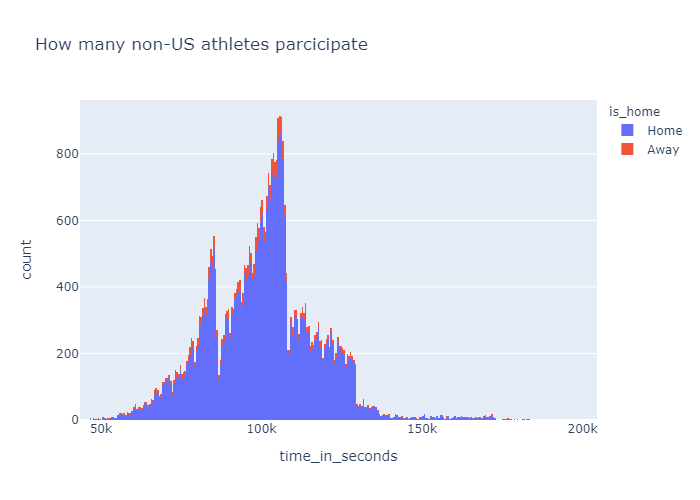

In [39]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [40]:
race_us.groupby(['country_alpha_3'])['country_alpha_3'].count().nlargest(5)
top_5c=['United States ','Canada','United Kingdom','Japan']

race_us.loc['top_5']=race_us.country_alpha_3.apply(lambda x: x if x in top_5c else 'Other')


d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
race_us_top5=race_us.loc[race_us.country_alpha_3.isin(top_5c)]

In [42]:
race_us_top5

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,...,participants,rank,runner,time,age,gender,nationality,time_in_seconds,country_alpha_3,is_home
2545,69219.0,Burning River Endurance Run,Burning River 100 Mile,Hudson,United States,2021-07-24,04:00:00,solo,163.7,2700.0,...,250.0,9.0,GUERARD SIMON,20H 18M 42S,35.0,M,CAN,73122.0,Canada,Away
2633,69219.0,Burning River Endurance Run,Burning River 100 Mile,Hudson,United States,2021-07-24,04:00:00,solo,163.7,2700.0,...,250.0,97.0,STRAW Keith,28H 32M 42S,66.0,M,GBR,102762.0,United Kingdom,Away
5320,68416.0,Western States Endurance Run,Western States Endurance Run,Auburn,United States,2021-06-26,05:00:00,solo,161.0,5850.0,...,369.0,7.0,PASCALL Beth,17H 10M 42S,34.0,W,GBR,61842.0,United Kingdom,Away
5330,68416.0,Western States Endurance Run,Western States Endurance Run,Auburn,United States,2021-06-26,05:00:00,solo,161.0,5850.0,...,369.0,17.0,HAWGOOD Emily,19H 13M 55S,27.0,W,GBR,69235.0,United Kingdom,Away
5364,68416.0,Western States Endurance Run,Western States Endurance Run,Auburn,United States,2021-06-26,05:00:00,solo,161.0,5850.0,...,369.0,51.0,SASAKI Takuji,23H 45M 11S,46.0,M,JPN,85511.0,Japan,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137763,3253.0,HURT 100,HURT 100 MILE ENDURANCE RUN,NaN,United States,2012-01-14,00:00:00,solo,161.0,7620.0,...,0.0,7.0,GARNEAU Tracy,26H 7M 0S,52.0,W,CAN,94020.0,Canada,Away
137783,3253.0,HURT 100,HURT 100 MILE ENDURANCE RUN,NaN,United States,2012-01-14,00:00:00,solo,161.0,7620.0,...,0.0,27.0,MIKLOS Kinga,34H 16M 0S,46.0,W,CAN,123360.0,Canada,Away
137786,3253.0,HURT 100,HURT 100 MILE ENDURANCE RUN,NaN,United States,2012-01-14,00:00:00,solo,161.0,7620.0,...,0.0,30.0,MIKLOS Stephan,34H 24M 0S,52.0,M,CAN,123840.0,Canada,Away
137799,3253.0,HURT 100,HURT 100 MILE ENDURANCE RUN,NaN,United States,2012-01-14,00:00:00,solo,161.0,7620.0,...,0.0,43.0,SCHOLZ Monica,35H 37M 0S,54.0,W,CAN,128220.0,Canada,Away


In [43]:
fig = px.histogram(race_us_top5, x="time_in_seconds", color='is_home',facet_row="country_alpha_3", title=' How long do the top 3 international countries run in US events')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(showticklabels=True)
fig.show()

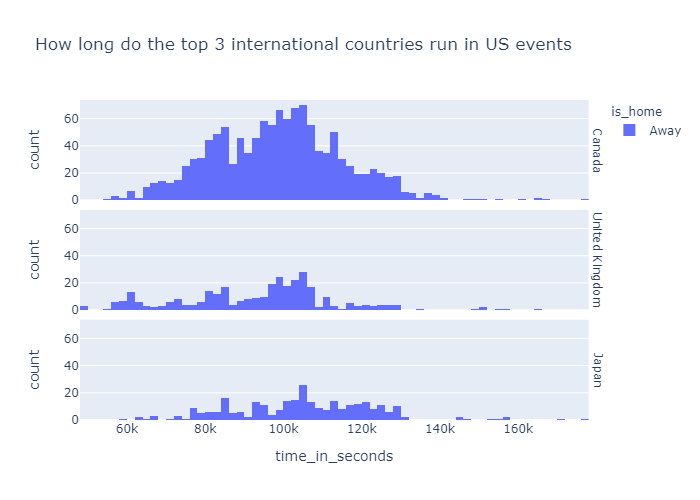

In [44]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)